<a href="https://colab.research.google.com/github/ileven1133/EDA_Anime/blob/main/3_02_1_1_CAT_inferential_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Estadístiques inferencials
Estudiarem distribucions de probabilitat amb una simulació. Comencem creant una funció per llançar una moneda:

In [2]:
def flip_coin():
    if np.random.randint(0,2) == 1:
        return "Cara"
    else:
        return "Creu"

## La fal·làcia del jugador

Primer, comencem per explorar l'aleatorietat d'aquest llançament. Construïu una llista que consti de 7 llançaments d'aquesta moneda:

In [3]:
def generar_llançaments(num_llançaments):
  resultats = [flip_coin() for _ in range(num_llançaments)]
  return resultats


In [4]:
llançaments = generar_llançaments(7)
print(llançaments)

['Cara', 'Creu', 'Cara', 'Cara', 'Cara', 'Cara', 'Creu']


Suposem que la llista llencés `['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara']`.

Diria que aquest és un escenari probable? Quina probabilitat diria que té en comparació amb, per exemple, una distribució com `['Cara', 'Creu', 'Cara', 'Cara', 'Creu', 'Cara', 'Creu']`?

Si tornés a llançar una moneda, què esperaria que passés?

Vegem-ho: creeu una simulació d'un joc en què intenteu llançar aquesta moneda set vegades deu mil vegades. Col·loqueu-les en una llista de llistes: la llista ha de tenir mil elements, i cadascun d'aquests elements ha de ser una llista amb set llançaments de moneda.

In [5]:
def simular_joc1(num_jocs, num_llançaments):
    resultats = []
    for _ in range(num_jocs):
        llançaments = generar_llançaments(num_llançaments)
        resultats.append(llançaments)
    return resultats

In [6]:
# Simular 10000 jocs de 7 llançaments
resultats_joc = simular_joc1(100000, 7)

# Imprimir els primers 10 resultats per exemple
for i in range(5):
  print(resultats_joc[i])

['Cara', 'Cara', 'Cara', 'Creu', 'Cara', 'Cara', 'Creu']
['Cara', 'Creu', 'Creu', 'Cara', 'Cara', 'Creu', 'Creu']
['Creu', 'Creu', 'Creu', 'Cara', 'Creu', 'Cara', 'Cara']
['Cara', 'Cara', 'Cara', 'Creu', 'Creu', 'Creu', 'Creu']
['Cara', 'Cara', 'Creu', 'Cara', 'Creu', 'Creu', 'Cara']


Mostra els primers cinc daquest joc. Després, estudia la probabilitat d'obtenir `['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara']` (explicant quants elements de la llista són iguals a ella) i compara-la amb la probabilitat de `['Cara', 'Creu', 'Cara', 'Cara', 'Creu', 'Cara', 'Creu']`.

In [7]:
def comptar_ocurrencies(resultats, sequencia):
    comptador = 0
    for llançaments in resultats:
        if llançaments == sequencia:
            comptador += 1
    return comptador

sequencia_cara = ['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara']
ocurrencies_cara = comptar_ocurrencies(resultats_joc, sequencia_cara)
probabilitat_cara = ocurrencies_cara / 10000

print(f"La seqüència ['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara'] apareix {ocurrencies_cara} vegades.")
print(f"La probabilitat experimental és {probabilitat_cara}.")

La seqüència ['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara'] apareix 775 vegades.
La probabilitat experimental és 0.0775.


In [8]:
sequencia_cara = ['Cara', 'Creu', 'Cara', 'Cara', 'Creu', 'Cara', 'Creu']
ocurrencies_cara = comptar_ocurrencies(resultats_joc, sequencia_cara)
probabilitat_cara = ocurrencies_cara / 10000

print(f"La seqüència ['Cara', 'Creu', 'Cara', 'Cara', 'Creu', 'Cara', 'Creu'] apareix {ocurrencies_cara} vegades.")
print(f"La probabilitat experimental és {probabilitat_cara}.")

La seqüència ['Cara', 'Creu', 'Cara', 'Cara', 'Creu', 'Cara', 'Creu'] apareix 758 vegades.
La probabilitat experimental és 0.0758.


La fal·làcia del jugador passa quan esperem que les coses aleatòries "sembli aleatòries". Això és una cosa que [li va passar a Spotify](https://web.archive.org/web/20240225195617/https://engineering.atspotify.com/2014/02/how-to-shuffle-songs/): la gent seguia queixant-se que la seva aleatorietat no era "prou aleatòria" fins que la van modificar perquè "semblés aleatòria" al, paradoxalment, fer-la menys aleatòria.

Ara, mostra els elements els primers sis llançaments dels quals són `['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara']`. Quina és la probabilitat que el setè també sigui `Cara`? (pista: podeu prendre els primers sis elements d'una llista trucant a `list[:6]`)

In [9]:
def trobar_sequencies(resultats, sequencia):
    sequencies_trobades = []
    for llançaments in resultats:
        if llançaments[:6] == sequencia:
            sequencies_trobades.append(llançaments)
    return sequencies_trobades

sequencia_inicial = ['Cara', 'Cara', 'Cara', 'Cara', 'Cara', 'Cara']
sequencies_amb_cara = trobar_sequencies(resultats_joc, sequencia_inicial)

print(f"Sequencies amb els primers sis llançaments 'Cara': {str(len(sequencies_amb_cara))}")


Sequencies amb els primers sis llançaments 'Cara': 1602


In [10]:
def probabilitat_sete_llançament_cara(sequencies):
    if not sequencies:
        return 0
    cares = 0
    for sequencia in sequencies:
        if len(sequencia) > 6 and sequencia[6] == 'Cara':
            cares += 1
    return cares / len(sequencies)

probabilitat_sete = probabilitat_sete_llançament_cara(sequencies_amb_cara)
print(f"La probabilitat experimental que el setè llançament sigui 'Cara' és: {probabilitat_sete}")

La probabilitat experimental que el setè llançament sigui 'Cara' és: 0.4837702871410737


Podeu tornar a intentar la simulació iniciant el quadern de nou. Els números haurien de romandre dins del rang del 60% al 40% per a cares i creus. ¡L'estadística no té noció de memòria!

## El teorema del límit central

Aquí és on les coses es posen interessants: suposem que, cada cop que la moneda surt `Cara`, guanyes una rupia. Cada vegada que surt `Creu`, perds un punt. Pren la simulació del joc, assigna una puntuació a cada jugada d'acord amb això i després dibuixa un histograma de la teva puntuació.

In [11]:
def calcular_puntuacio(llançaments):
    puntuacio = 0
    for llançament in llançaments:
        if llançament == 'Cara':
            puntuacio += 1
        else:
            puntuacio -= 1
    return puntuacio

def simular_joc2(num_jocs, num_llançaments):
    puntuacions = []
    for _ in range(num_jocs):
        llançaments = [flip_coin() for _ in range(num_llançaments)]
        puntuacions.append(calcular_puntuacio(llançaments))
    return puntuacions

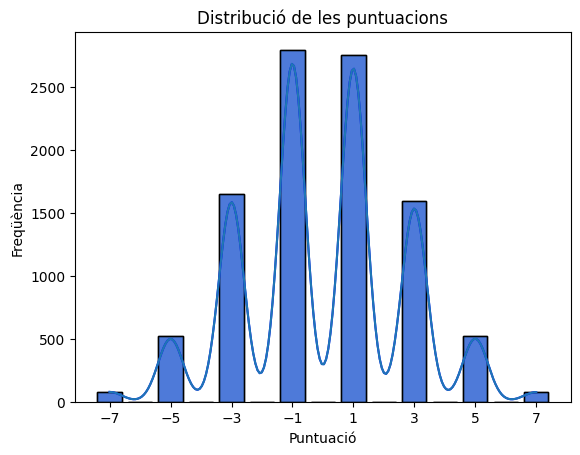

In [12]:
# Simular 10000 jocs de 7 llançaments
puntuacions = simular_joc2(10000, 7)

# Generar l'histograma amb seaborn
# Set x-ticks to odd numbers only
min_val = int(min(puntuacions))
max_val = int(max(puntuacions))

# Create a range of odd numbers between min and max
odd_ticks = [x for x in range(min_val, max_val + 1) if x % 2 == 1]

bins = range(min_val - 0, max_val + 2)
sns.histplot(puntuacions, bins=bins, kde=True, discrete=True, color='blue', shrink=0.8)
bins = range(min(puntuacions) - 0, max(puntuacions) + 2)
sns.histplot(puntuacions, bins=bins, kde=True, discrete=True, shrink=0.8)
plt.xlabel('Puntuació')
plt.ylabel('Freqüència')
plt.title('Distribució de les puntuacions')
plt.xticks(odd_ticks)
plt.show()

Et resulta familiar? Torna a simular els jocs i els guanys, però aquesta vegada amb vint llançaments de moneda.

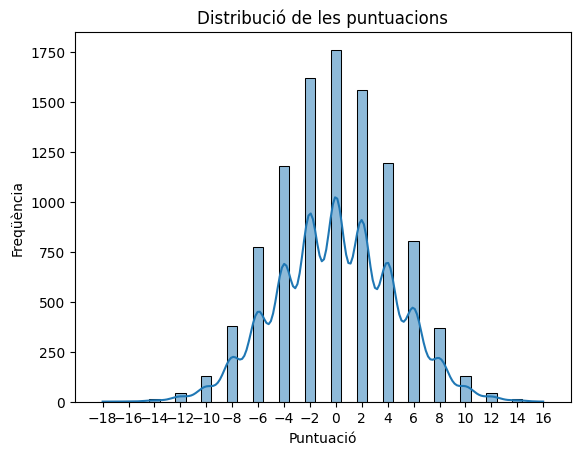

In [13]:
# Simular 10000 jocs de 7 llançaments
puntuacions = simular_joc2(10000, 20)

# Generar l'histograma amb seaborn
# Set x-ticks to odd numbers only
min_val = int(min(puntuacions))
max_val = int(max(puntuacions))

# Create a range of odd numbers between min and max
pair_ticks = [x for x in range(min_val, max_val + 1) if x % 2 != 1]

bins = range(min_val - 0, max_val + 2)
sns.histplot(puntuacions, bins=bins, kde=True, discrete=True, shrink=0.8)
plt.xlabel('Puntuació')
plt.ylabel('Freqüència')
plt.title('Distribució de les puntuacions')
plt.xticks(pair_ticks)
plt.show()

Aquest és el [teorema del límit central](https://www.youtube.com/watch?v=zeJD6dqJ5lo): **en condicions apropiades, la distribució d'una versió normalitzada de la mitjana de la mostra convergeix una distribució normal estàndard**. En aquest cas, té cert sentit: la majoria de vegades guanyaràs la meitat dels llançaments, perdràs l'altra meitat i acabaràs empatant. De vegades tindreu molta sort, o molt mala sort, però aquestes seran l'excepció i no la norma.

## Prova d'hipòtesis

Ara, suposem que rebem una moneda diferent i no hi confiem: la vam llançar 100 vegades i vam obtenir 70 cares. Com vam veure, això no és del tot impossible, només improbable. Tot i així, volem provar la hipòtesi que la probabilitat real és 0,5, com la moneda que ja tenim, que sabem que és justa.

Comencem creant una funció que prengui `flip_coin`, la proveu cent vegades i compti la quantitat de cares. Executeu aquesta funció cent mil vegades i anoteu cadascun dels resultats en un marc de dades, la columna anomenada `n_caras`.

In [20]:
def comptar_cares(num_llançaments):
    return sum(1 for _ in range(num_llançaments) if flip_coin() == 'Cara')

n_simulations = 100000
n_flips = 100

count_head_list = [comptar_cares(n_flips) for _ in range(n_simulations)]

df = pd.DataFrame({"n_caras": count_head_list})

df.head(20)

,n_caras
0,50
1,49
2,47
3,57
4,49
5,43
6,41
7,45
8,48
9,51


En estadística, un [valor p](https://en.wikipedia.org/wiki/P-value) es defineix com un número que indica la probabilitat d'obtenir un valor que sigui almenys igual o més gran que l'observació real si la [hipòtesi nul·la](https://en.wikipedia.org/wiki/Null_hypothesis) és correcta.

En el nostre cas, en què no confiem en la moneda, la hipòtesi nul·la és que la moneda és justa. Per tant, el que estem preguntant és:

### Si la moneda fos justa, quina seria la probabilitat d'obtenir 70 cares seguides?

Calcula això: mira el marc de dades i obté la quantitat de vegades que la moneda va sortir cara 70 o més vegades, dividida per la quantitat de jocs que vas jugar. Aquest és el teu valor p.

In [25]:
alpha = 0.05
n_total_simulacions = len(df)

umbral = next(
    i for i in range(100)
    if (len(df[df["n_caras"] >= i]) / n_total_simulacions) < alpha
)

print(f"Umbral crítico: {umbral} caras (probabilidad = {len(df[df['n_caras'] >= umbral]) / n_total_simulacions:.4f}")

Umbral crítico: 59 caras (probabilidad = 0.0437


In [26]:
alpha = 0.05
n_total_simulacions = len(df)

for i in range(100):
    # Calcular la probabilidad de obtener >= i caras
    prob = len(df[df["n_caras"] >= i]) / n_total_simulacions

    if prob < alpha:
        print(f"Umbral crítico: {i} caras (probabilidad = {prob:.4f})")
        break

Umbral crítico: 59 caras (probabilidad = 0.0437)


In [21]:
# Calcular el valor p
valor_p = len(df[df['n_caras'] >= 70]) / len(df)

print(f"El valor p és: {valor_p}")

El valor p és: 4e-05


Quantes cares podries obtenir a 100 llançaments abans de començar a sospitar que la moneda és injusta?

In [23]:
import scipy.stats as stats

def calcular_nombre_cares(llindar_significació):
    # Calcular el valor z corresponent al llindar de significació
    valor_z = stats.norm.ppf(1 - llindar_significació)

    # Calcular el nombre de cares corresponent al valor z
    nombre_cares = 50 + valor_z * (100 * 0.5 * 0.5) ** 0.5

    return int(nombre_cares)

# Calcular el nombre de cares per a un llindar de significació de 0.05
nombre_cares_005 = calcular_nombre_cares(0.05)
print(f"Per a un llindar de significació de 0.05, el nombre de cares és: {nombre_cares_005}")

# Calcular el nombre de cares per a un llindar de significació de 0.01
nombre_cares_001 = calcular_nombre_cares(0.01)
print(f"Per a un llindar de significació de 0.01, el nombre de cares és: {nombre_cares_001}")

Per a un llindar de significació de 0.05, el nombre de cares és: 58
Per a un llindar de significació de 0.01, el nombre de cares és: 61
